In [51]:
%pip install pandas numpy matplotlib seaborn openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
Customer_Demographics = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Demographics')
Transaction_History = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Transaction_History')
Customer_Service = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Service')
Online_Activity = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Online_Activity')
Churn_Status = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Churn_Status')

In [54]:
data = Customer_Demographics.merge(Transaction_History, on='CustomerID', how='outer') \
                            .merge(Customer_Service, on='CustomerID', how='outer')\
                                .merge(Online_Activity, on='CustomerID', how='outer')\
                                    .merge(Churn_Status, on='CustomerID', how='outer')

data.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [55]:
data.isna().sum()

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
TransactionID          0
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionID       1608
InteractionDate     1608
InteractionType     1608
ResolutionStatus    1608
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64

In [58]:
data['InteractionID'] = data['InteractionID'].fillna(0)
data['InteractionDate'] = data['InteractionDate'].fillna('0000-00-00')
data['InteractionType'] = data['InteractionType'].fillna('Not contacted')
data['ResolutionStatus'] = data['ResolutionStatus'].fillna('Not contacted')

data

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31 00:00:00,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,2724,2022-09-08,232.06,Groceries,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2917,2022-12-13,324.98,Books,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2979,2022-06-15,375.34,Groceries,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0
6810,1000,34,M,Widowed,Low,8594,2022-04-08,166.73,Books,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0


In [82]:
data['ProductCategory'].unique()

array(['Electronics', 'Clothing', 'Furniture', 'Groceries', 'Books'],
      dtype=object)

In [88]:
x = data.groupby('ProductCategory')['AmountSpent'].sum().reset_index()
x

,ProductCategory,AmountSpent
0,Books,352766.49
1,Clothing,341669.02
2,Electronics,341851.29
3,Furniture,324676.09
4,Groceries,353076.14


/tmp/ipykernel_1099/3880961871.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower center',fontsize=10, title_fontsize=12, ncol=5)


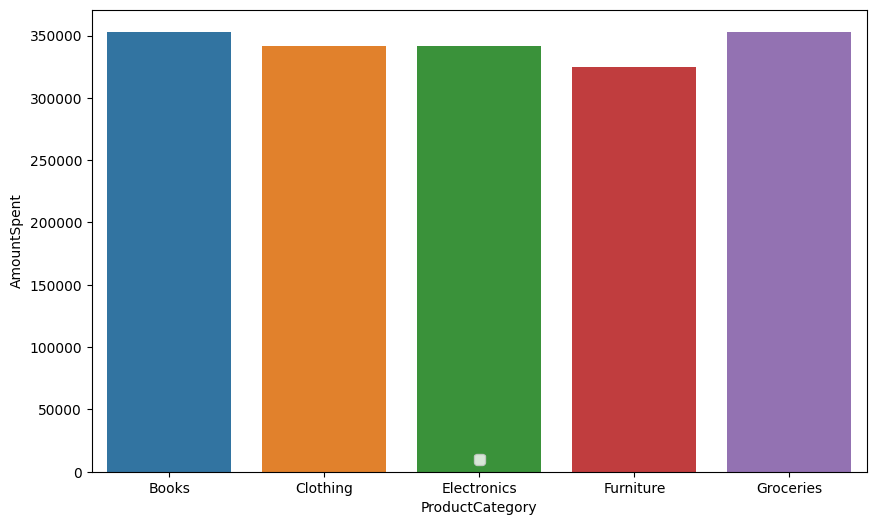

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(x='ProductCategory',y='AmountSpent', data=x, hue='ProductCategory')
plt.legend(loc='lower center',fontsize=10, title_fontsize=12, ncol=5)